In [11]:
#practice file for the qiskit book: https://qiskit.org/textbook/ch-states/introduction.html
#Author: Ryan30
#Date: 2020-10-25


#https://qiskit.org/textbook/ch-states/atoms-computation.html
#ch 1.2 - Atoms of computation

#try the widget out
#from qiskit_textbook.widgets import binary_widget
#binary_widget(nbits=6)

#Example 3 - First quantum circuit
#import QC modules
from qiskit import QuantumCircuit, execute, Aer
from qiskit.visualization import plot_histogram

#word of advice dont put a number this large because the server crashed, lol.
#n = 8000

n = 12
#this represents the number of qubits in the circuit
n_q = n

#this represents the number of outputs in the circuit
n_b = n
qc_out = QuantumCircuit(n_q,n_b)

for j in range(n):
    qc_out.measure(j,j)
    
qc_out.draw()


┌─┐                                 
 q_0: ┤M├─────────────────────────────────
      └╥┘┌─┐                              
 q_1: ─╫─┤M├──────────────────────────────
       ║ └╥┘┌─┐                           
 q_2: ─╫──╫─┤M├───────────────────────────
       ║  ║ └╥┘┌─┐                        
 q_3: ─╫──╫──╫─┤M├────────────────────────
       ║  ║  ║ └╥┘┌─┐                     
 q_4: ─╫──╫──╫──╫─┤M├─────────────────────
       ║  ║  ║  ║ └╥┘┌─┐                  
 q_5: ─╫──╫──╫──╫──╫─┤M├──────────────────
       ║  ║  ║  ║  ║ └╥┘┌─┐               
 q_6: ─╫──╫──╫──╫──╫──╫─┤M├───────────────
       ║  ║  ║  ║  ║  ║ └╥┘┌─┐            
 q_7: ─╫──╫──╫──╫──╫──╫──╫─┤M├────────────
       ║  ║  ║  ║  ║  ║  ║ └╥┘┌─┐         
 q_8: ─╫──╫──╫──╫──╫──╫──╫──╫─┤M├─────────
       ║  ║  ║  ║  ║  ║  ║  ║ └╥┘┌─┐      
 q_9: ─╫──╫──╫──╫──╫──╫──╫──╫──╫─┤M├──────
       ║  ║  ║  ║  ║  ║  ║  ║  ║ └╥┘┌─┐   
q_10: ─╫──╫──╫──╫──╫──╫──╫──╫──╫──╫─┤M├───
       ║  ║  ║  ║  ║  ║  ║  ║  ║  ║ └╥┘┌─┐
q_11: ─╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫─┤M├
       ║  ║  ║  ║  ║  ║  ║  ║  ║  ║  ║ └╥┘
c: 12/═╩══╩══╩══╩══╩══╩══╩══╩══╩══╩══╩══╩═
       0  1  2  3  4  5  6  7  8  9  10 11

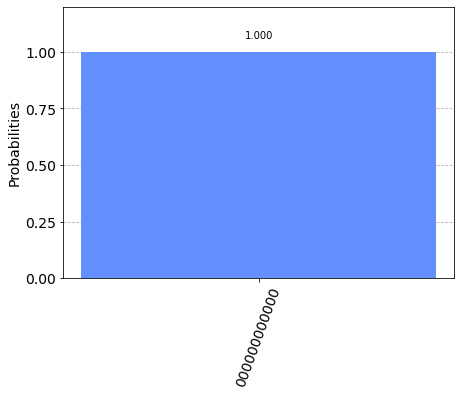

In [12]:
#According to the book we have initialized our qubits to output 0 and we can see that the result is all zeroes
#based on the input so n= 8 has 8 zeros, etc. 
#TODO: read up on the Aer module. It looks like you can swap out your back end which is cool. 
counts = execute(qc_out, Aer.get_backend('qasm_simulator')).result().get_counts()
plot_histogram(counts)